# EDA Soil

In [92]:
data_folder = "../../data/processed"
data_files = {
    "fire": "fire/fire.csv",
    "landcover": "landcover",
    "climate": "climate",
    "elevation": "elevation",
    "soil_raster": "soil/smu_raster.nc",
    "soil_att": "soil/soil.csv"
}

raw_data_folder = "../../data/raw/"
raw_data_files = { 
    "dz_boundaries": "gadm41_DZA_shp/gadm41_DZA_0.shp",
    "tn_boundaries": "gadm41_TUN_shp/gadm41_TUN_0.shp"
}

In [93]:
import xarray as xr
import os
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import rasterio
import geopandas

## Loading the data

In [94]:
filepath = os.path.join(data_folder, data_files["soil_raster"])
ds = xr.open_dataset(filepath)
print(ds)                
print(ds.variables)      
print(ds["HWSD2_SMU_ID"].shape) 
arr = ds["HWSD2_SMU_ID"].values 

<xarray.Dataset> Size: 11MB
Dimensions:       (y: 2233, x: 2480)
Coordinates:
  * y             (y) float64 18kB 37.56 37.55 37.55 37.54 ... 18.98 18.97 18.96
  * x             (x) float64 20kB -8.671 -8.662 -8.654 ... 11.97 11.98 11.99
Data variables:
    HWSD2_SMU_ID  (y, x) uint16 11MB ...
Frozen({'y': <xarray.IndexVariable 'y' (y: 2233)> Size: 18kB
array([37.5625  , 37.554167, 37.545833, ..., 18.979167, 18.970833, 18.9625  ],
      shape=(2233,)), 'x': <xarray.IndexVariable 'x' (x: 2480)> Size: 20kB
array([-8.670833, -8.6625  , -8.654167, ..., 11.970833, 11.979167, 11.9875  ],
      shape=(2480,)), 'HWSD2_SMU_ID': <xarray.Variable (y: 2233, x: 2480)> Size: 11MB
[5537840 values with dtype=uint16]
Attributes:
    crs:        OGC:CRS84
    transform:  [0.00833333333333333, 0.0, -8.674999999999727, 0.0, -0.008333...})
(2233, 2480)


In [95]:
filepath = os.path.join(data_folder, data_files["soil_att"])
soil_df = pd.read_csv(filepath)
soil_df.head()

,COARSE,SAND,SILT,CLAY,TEXTURE_USDA,TEXTURE_SOTER,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,SHARE,HWSD2_SMU_ID
0,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,6,5,59,0,2,0.0,0.1,1,20,12704
1,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,6,5,59,0,2,0.0,0.1,1,20,12705
2,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,6,5,59,0,2,0.0,0.1,1,40,12707
3,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,6,5,59,0,2,0.0,0.1,1,20,12708
4,2,24,52,24,7.0,M,1.44,1.76,1.475,5.2,...,6,4,41,50,2,0.0,0.1,0,100,11825


## Understanding the Attributes

In [96]:
soil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58405 entries, 0 to 58404
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COARSE         58405 non-null  int64  
 1   SAND           58405 non-null  int64  
 2   SILT           58405 non-null  int64  
 3   CLAY           58405 non-null  int64  
 4   TEXTURE_USDA   57116 non-null  float64
 5   TEXTURE_SOTER  58405 non-null  object 
 6   BULK           58405 non-null  float64
 7   REF_BULK       57116 non-null  float64
 8   ORG_CARBON     57733 non-null  float64
 9   PH_WATER       58405 non-null  float64
 10  TOTAL_N        58405 non-null  float64
 11  CN_RATIO       58405 non-null  int64  
 12  CEC_SOIL       58405 non-null  int64  
 13  CEC_CLAY       58405 non-null  int64  
 14  CEC_EFF        58405 non-null  int64  
 15  TEB            58405 non-null  int64  
 16  BSAT           58405 non-null  int64  
 17  ALUM_SAT       58405 non-null  int64  
 18  ESP   

In [97]:
soil_df.head()

,COARSE,SAND,SILT,CLAY,TEXTURE_USDA,TEXTURE_SOTER,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,SHARE,HWSD2_SMU_ID
0,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,6,5,59,0,2,0.0,0.1,1,20,12704
1,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,6,5,59,0,2,0.0,0.1,1,20,12705
2,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,6,5,59,0,2,0.0,0.1,1,40,12707
3,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,6,5,59,0,2,0.0,0.1,1,20,12708
4,2,24,52,24,7.0,M,1.44,1.76,1.475,5.2,...,6,4,41,50,2,0.0,0.1,0,100,11825


In [98]:
soil_df.nunique()

COARSE              44
SAND                86
SILT                65
CLAY                63
TEXTURE_USDA         9
TEXTURE_SOTER        5
BULK               103
REF_BULK            76
ORG_CARBON         505
PH_WATER            54
TOTAL_N            290
CN_RATIO            29
CEC_SOIL            68
CEC_CLAY            98
CEC_EFF             77
TEB                 78
BSAT                95
ALUM_SAT            53
ESP                 44
TCARBON_EQ         111
GYPSUM              39
ELEC_COND           14
SHARE               96
HWSD2_SMU_ID     29538
dtype: int64

=> **Categorical Features**:
* `TEXTURE_USDA`
* `TEXTURE_SOTER`

In [99]:
cat_features = ['TEXTURE_USDA', 'TEXTURE_SOTER']

num_features = [
    "COARSE", "SAND", "SILT", "CLAY", "TEXTURE_USDA", "TEXTURE_SOTER",
    "BULK", "REF_BULK", "ORG_CARBON", "PH_WATER", "TOTAL_N", "CN_RATIO",
    "CEC_SOIL", "CEC_CLAY", "CEC_EFF", "TEB", "BSAT", "ALUM_SAT", "ESP",
    "TCARBON_EQ", "GYPSUM", "ELEC_COND"
]

`SHARE` represents the percentage of each soil type in a specific SMU. 

In [100]:
soil_df.groupby('HWSD2_SMU_ID')['SHARE'].value_counts()

HWSD2_SMU_ID  SHARE
2             10       2
              30       1
              50       1
36            100      1
37            30       1
                      ..
49826         100      1
49827         100      1
49828         100      1
49829         100      1
49830         100      1
Name: count, Length: 51706, dtype: int64

In [101]:
unique_smu_ids = np.unique(soil_df['HWSD2_SMU_ID'])
print(unique_smu_ids[:10])

unique_ids = np.unique(arr)
print(unique_ids[:10])

print(all([raster_id in unique_smu_ids for raster_id in unique_ids]))
print([raster_id for raster_id in unique_ids if raster_id not in unique_smu_ids])


[ 2 36 37 38 39 41 44 45 47 50]
[ 36  61  87  92  99 193 195 251 262 320]
False
[np.uint16(65535)]


In [102]:
soil_df['TEXTURE_SOTER'].value_counts()


TEXTURE_SOTER
M    43216
C     8007
F     5869
-     1289
V       24
Name: count, dtype: int64

In [103]:
soil_df['TEXTURE_USDA'].value_counts()


TEXTURE_USDA
9.0     21935
11.0    13373
5.0      8570
3.0      3623
12.0     3230
10.0     3184
7.0      2976
8.0       194
4.0        31
Name: count, dtype: int64

In [116]:
soil_df['HWSD2_SMU_ID'].value_counts()

HWSD2_SMU_ID
36137    12
36183    12
36103    12
36089    11
36075    10
         ..
49787     1
49788     1
49770     1
49807     1
49806     1
Name: count, Length: 29538, dtype: int64

## Aggregating SMU Entries

### Using Weighted Mean for Numerical Features

In [104]:
def weighted_avg(group):
    weights = group['SHARE'] / 100.0  # Convert percent to fraction
    result = {}
    for feature in num_features:
        values = group[feature]
        if np.issubdtype(values.dtype, np.number):
            result[feature] = np.average(values, weights=weights) if weights.sum() > 0 else np.nan
        else:
            result[feature] = np.nan  # skip non-numeric fields
    return pd.Series(result)

# Apply the function to each group
aggregated_df = soil_df.groupby('HWSD2_SMU_ID').apply(weighted_avg).reset_index()

/tmp/ipykernel_36538/271091786.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_df = soil_df.groupby('HWSD2_SMU_ID').apply(weighted_avg).reset_index()


### Using Mode for Categorical Features

In [105]:
def most_common_texture(group, column):
    counts = group[column].value_counts()
    return counts.index[0] if not counts.empty else np.nan


aggregated_df['TEXTURE_USDA'] = soil_df.groupby('HWSD2_SMU_ID').apply(
    lambda g: most_common_texture(g, 'TEXTURE_USDA')
).reset_index(drop=True)

aggregated_df['TEXTURE_SOTER'] = soil_df.groupby('HWSD2_SMU_ID').apply(
    lambda g: most_common_texture(g, 'TEXTURE_SOTER')
).reset_index(drop=True)

/tmp/ipykernel_36538/4061189495.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_df['TEXTURE_USDA'] = soil_df.groupby('HWSD2_SMU_ID').apply(
/tmp/ipykernel_36538/4061189495.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_df['TEXTURE_SOTER'] = soil_df.groupby('HWSD2_SMU_ID').apply(


In [106]:
aggregated_df.shape[0], soil_df.shape[0]

(29538, 58405)

In [107]:
df = aggregated_df

In [108]:
df.isna().sum()

HWSD2_SMU_ID        0
COARSE              0
SAND                0
SILT                0
CLAY                0
TEXTURE_USDA      614
TEXTURE_SOTER       0
BULK                0
REF_BULK         1286
ORG_CARBON        672
PH_WATER            0
TOTAL_N             0
CN_RATIO            0
CEC_SOIL            0
CEC_CLAY            0
CEC_EFF             0
TEB                 0
BSAT                0
ALUM_SAT            0
ESP                 0
TCARBON_EQ          0
GYPSUM              0
ELEC_COND           0
dtype: int64

In [109]:
df[num_features].describe()

,COARSE,SAND,SILT,CLAY,TEXTURE_USDA,BULK,REF_BULK,ORG_CARBON,PH_WATER,TOTAL_N,...,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND
count,29538.000000,29538.000000,29538.000000,29538.000000,28924.000000,29538.000000,28252.000000,28866.000000,29538.000000,29538.000000,...,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000
mean,11.031379,44.479470,30.838112,21.631343,8.538031,1.204614,1.720519,2.315512,6.535504,1.540940,...,17.303907,49.674079,22.984354,21.497950,77.783103,3.801508,3.133600,5.280208,0.992333,0.952728
std,7.438219,15.208395,10.740093,9.373370,2.351794,1.006094,0.132844,4.185430,2.042359,1.994287,...,10.708304,18.445499,13.794132,14.497141,23.444022,8.243572,5.680933,7.418350,3.151395,1.805158
min,-9.000000,-9.000000,-9.000000,-9.000000,3.000000,-9.000000,0.970000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,5.000000,36.000000,25.000000,16.150000,7.000000,1.290000,1.654200,0.727000,6.000000,0.874025,...,12.440000,37.600000,13.500000,10.000000,66.600000,0.000000,1.300000,0.000000,0.200000,0.600000
50%,10.000000,43.000000,32.000000,20.000000,9.000000,1.380000,1.720000,1.367780,6.700000,1.217000,...,16.000000,50.200000,21.000000,18.700000,83.100000,0.000000,2.000000,1.575000,0.420000,1.000000
75%,16.000000,53.000000,37.000000,27.000000,10.000000,1.448800,1.810000,2.257100,7.850000,1.788750,...,20.000000,63.000000,32.000000,32.000000,97.635000,3.300000,3.000000,9.600000,1.600000,1.000000
max,49.000000,94.000000,62.000000,65.000000,12.000000,1.760000,2.090000,49.680000,9.000000,23.480000,...,105.000000,120.600000,143.000000,143.000000,100.000000,85.000000,73.000000,31.299999,57.599998,32.000000


In [110]:
soil_df[num_features].describe()

,COARSE,SAND,SILT,CLAY,TEXTURE_USDA,BULK,REF_BULK,ORG_CARBON,PH_WATER,TOTAL_N,...,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND
count,58405.000000,58405.000000,58405.000000,58405.000000,57116.000000,58405.000000,57116.000000,57733.000000,58405.000000,58405.000000,...,58405.00000,58405.000000,58405.000000,58405.000000,58405.000000,58405.000000,58405.000000,58405.000000,58405.000000,58405.000000
mean,11.184573,46.051879,30.209023,21.282664,8.602581,1.226432,1.707009,2.706419,6.396850,1.720019,...,17.71172,48.530708,21.153514,19.685352,74.592090,5.352230,3.379779,3.985683,0.913780,0.980396
std,8.437106,17.348953,11.973649,10.549217,2.500621,0.863178,0.161498,6.243177,1.924548,2.559947,...,14.34821,20.671863,14.940306,15.732238,25.863499,11.164197,7.312943,6.676669,3.176970,2.110009
min,-9.000000,-9.000000,-9.000000,-9.000000,3.000000,-9.000000,0.970000,-9.000000,-9.000000,-9.000000,...,-9.00000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,4.000000,36.000000,23.000000,16.000000,7.000000,1.290000,1.650000,0.711000,5.700000,0.800000,...,11.00000,35.000000,10.000000,8.000000,64.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,10.000000,43.000000,31.000000,20.000000,9.000000,1.370000,1.710000,1.316000,6.600000,1.140000,...,16.00000,48.000000,20.000000,16.000000,82.000000,0.000000,2.000000,0.000000,0.300000,1.000000
75%,18.000000,55.000000,38.000000,27.000000,11.000000,1.460000,1.810000,2.200000,7.700000,1.780000,...,20.00000,65.000000,30.000000,30.000000,97.000000,6.000000,3.000000,6.900000,1.600000,1.000000
max,49.000000,94.000000,67.000000,65.000000,12.000000,1.760000,2.090000,49.680000,9.000000,23.480000,...,105.00000,128.000000,143.000000,143.000000,100.000000,85.000000,73.000000,31.299999,57.599998,32.000000


## Projection on Map

In [111]:
### Loading and merging the boundaries of Algeria and Tunisia
def load_dz_tn_boundaries(dz_shapefile_path, tn_shapefile_path):
    dz = geopandas.read_file(dz_shapefile_path)
    tn = geopandas.read_file(tn_shapefile_path)

    # Ensure both shapefiles use the same CRS 
    if dz.crs != tn.crs:
        tn = tn.to_crs(dz.crs)

    # Concatenate the GeoDataFrames
    boundaries = geopandas.GeoDataFrame(pd.concat([dz, tn], ignore_index=True), crs=dz.crs)

    return boundaries

# Shapefile downloaded from https://gadm.org/
dz_boundaries_filepath = os.path.join(raw_data_folder, raw_data_files["dz_boundaries"])
tn_boundaries_filepath = os.path.join(raw_data_folder, raw_data_files["tn_boundaries"])

boundaries = load_dz_tn_boundaries(dz_boundaries_filepath, tn_boundaries_filepath)

In [112]:
print(ds.get("HWSD2_SMU_ID", {}).attrs['transform'])

[0.00833333333333333, 0.0, -8.674999999999727, 0.0, -0.00833333333333333, 37.56666666666665, 0.0, 0.0, 1.0]


In [ ]:
from affine import Affine

raw_transform = ds.get("HWSD2_SMU_ID", {}).attrs.get('transform', None)
raw_transform = list(map(float, raw_transform.strip('[').strip(']').split(',')))
if raw_transform is None:
    raise ValueError("Transform attribute missing.")
transform = Affine(*raw_transform)

In [114]:
print(arr)

[[65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 ...
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]]


[65535 65535 65535 ... 65535 65535 65535]
Rendering column: COARSE


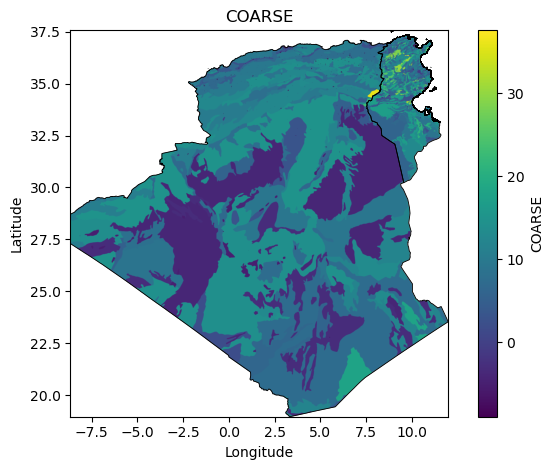

Rendering column: SAND


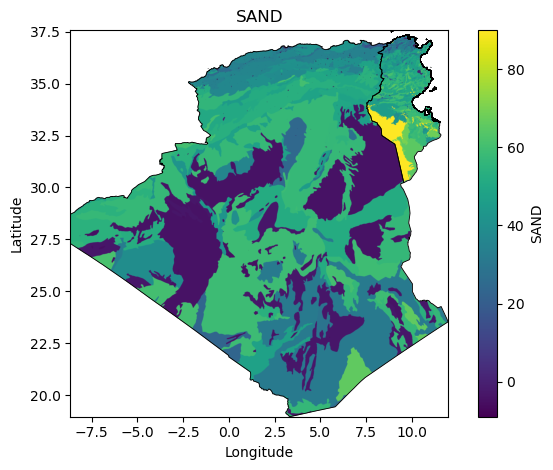

Rendering column: SILT


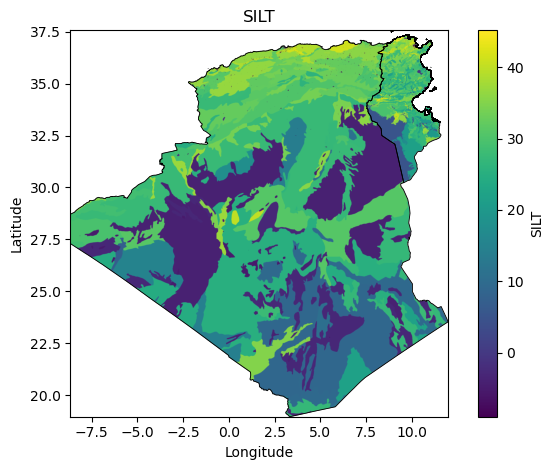

Rendering column: CLAY


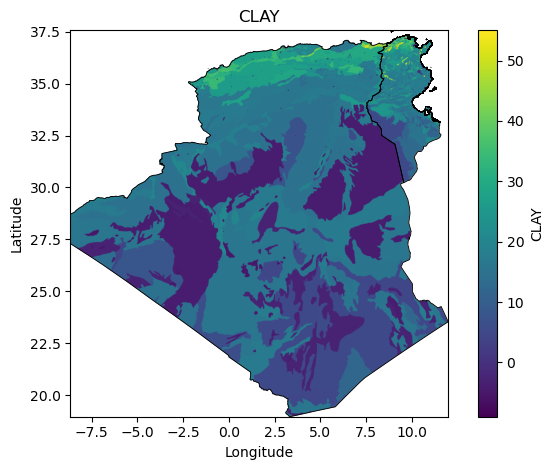

Rendering column: TEXTURE_USDA


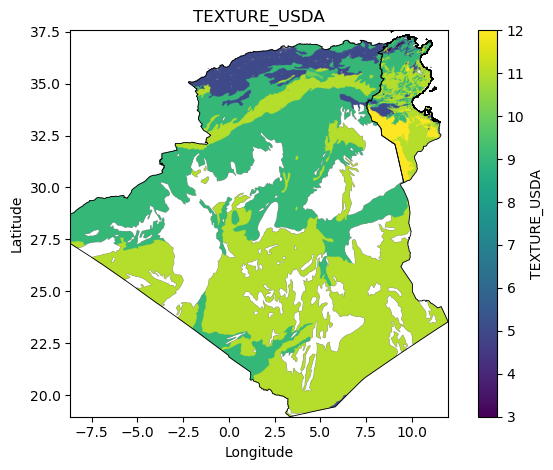

Rendering column: TEXTURE_SOTER


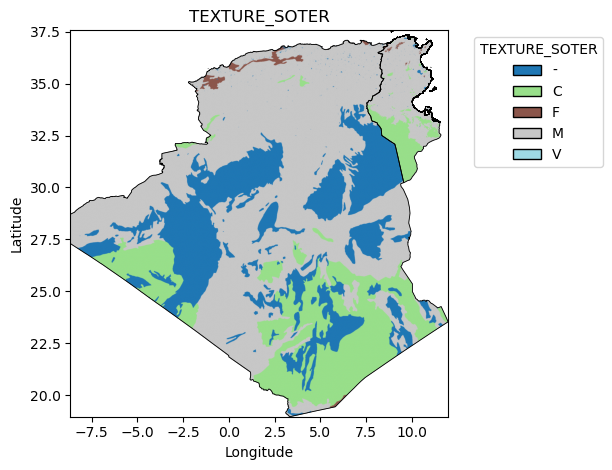

Rendering column: BULK


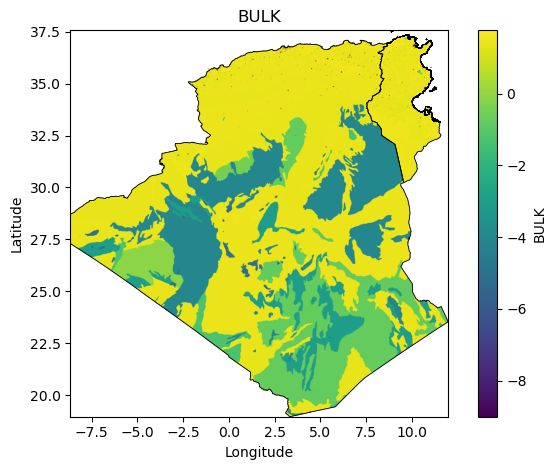

Rendering column: REF_BULK


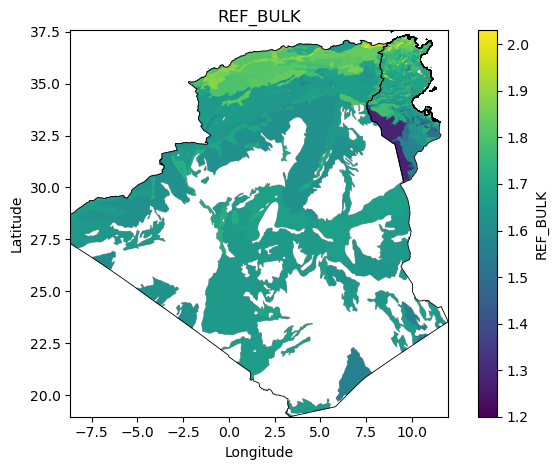

Rendering column: ORG_CARBON


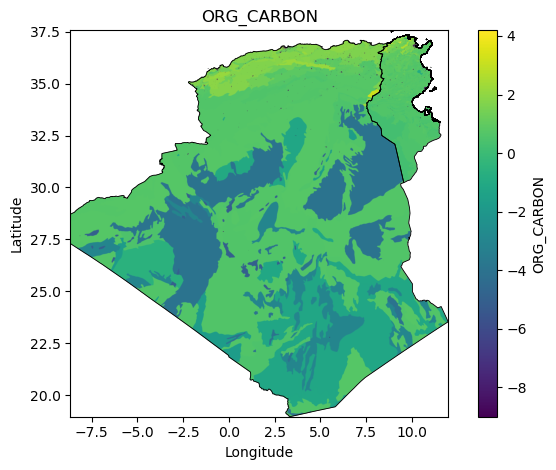

Rendering column: PH_WATER


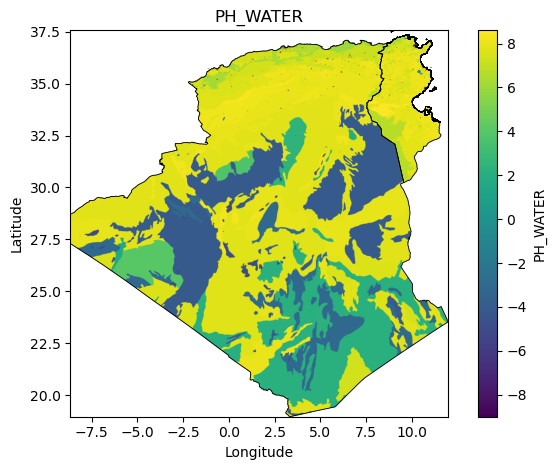

Rendering column: TOTAL_N


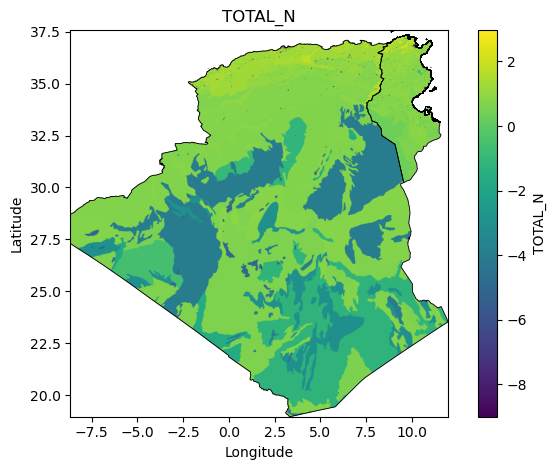

Rendering column: CN_RATIO


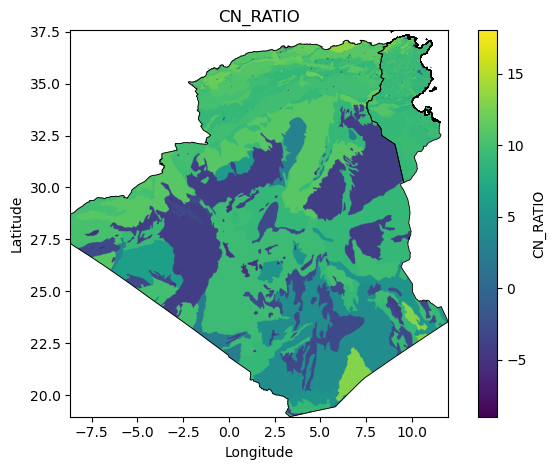

Rendering column: CEC_SOIL


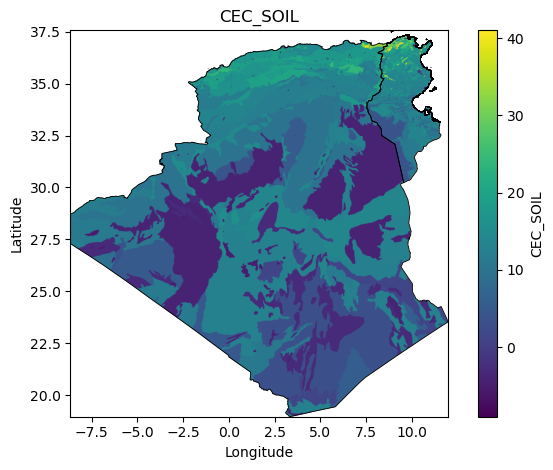

Rendering column: CEC_CLAY


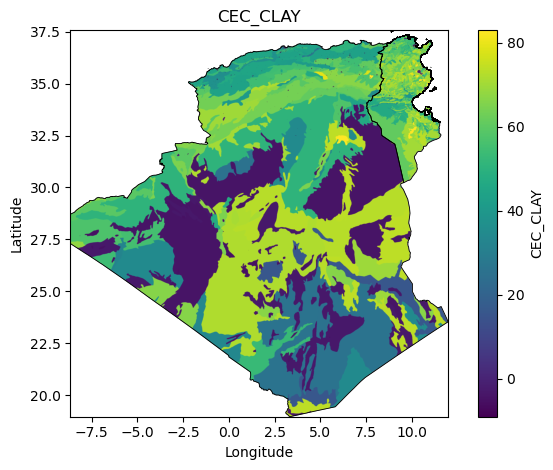

Rendering column: CEC_EFF


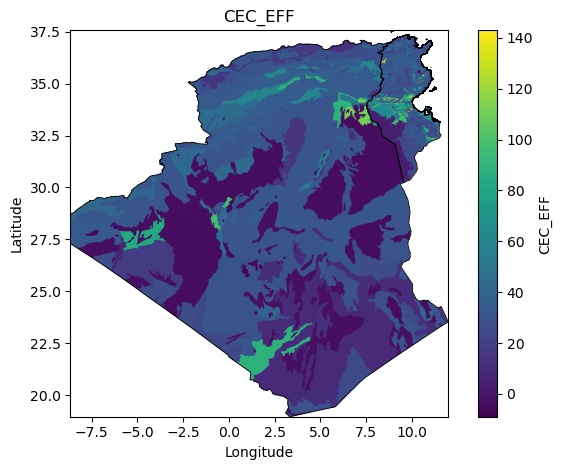

Rendering column: TEB


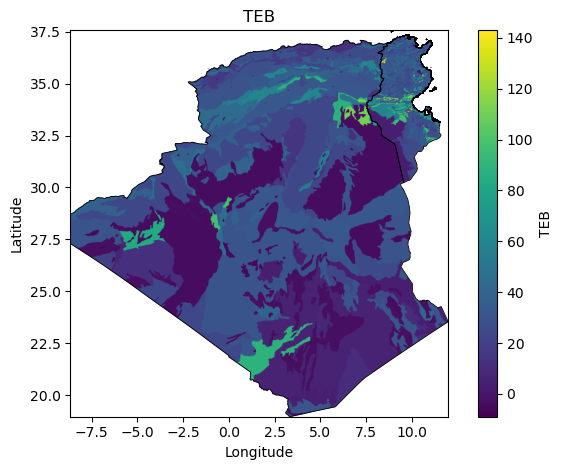

Rendering column: BSAT


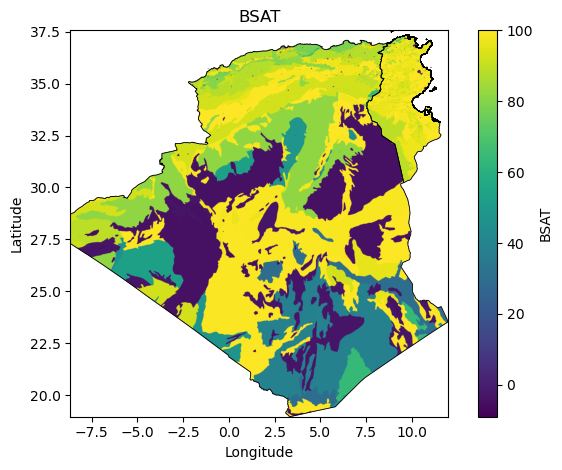

Rendering column: ALUM_SAT


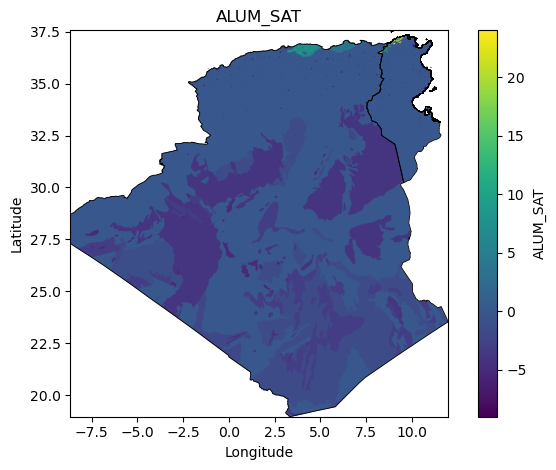

Rendering column: ESP


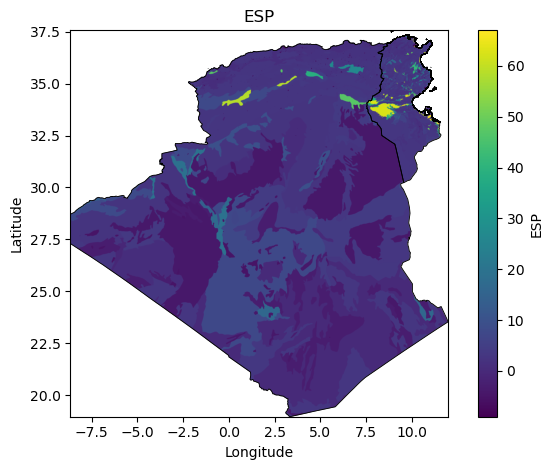

Rendering column: TCARBON_EQ


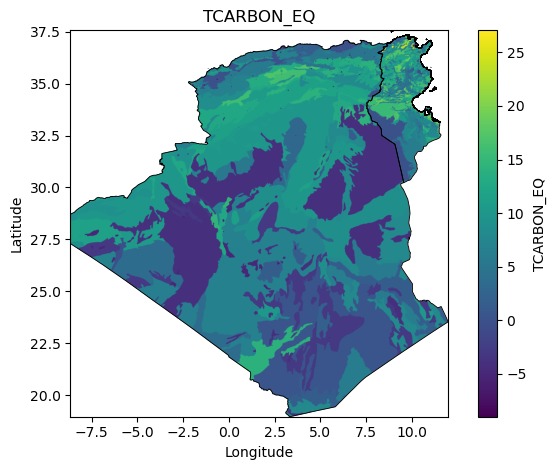

Rendering column: GYPSUM


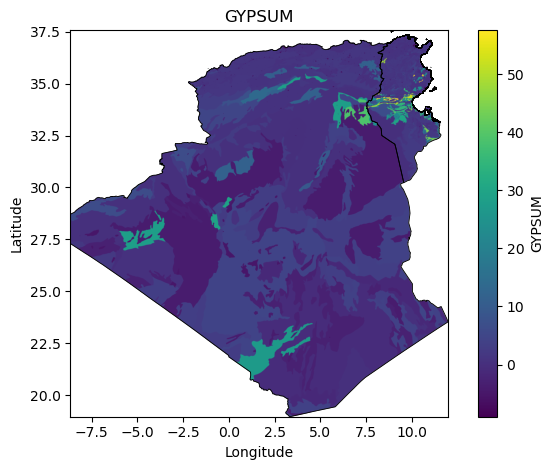

Rendering column: ELEC_COND


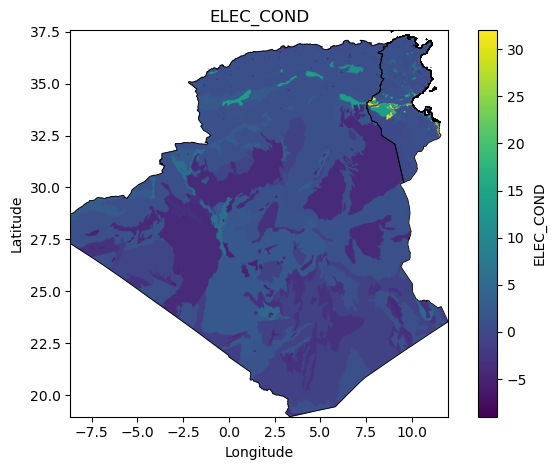

In [115]:
img = arr

# raster dims and flattened SMU ids
h, w = img.shape[0], img.shape[1]
flat_ids = img.ravel()

print(flat_ids)

# columns to visualize (skip the key id column if present)
id_col = 'HWSD2_SMU_ID'
cols = [c for c in df.columns if c != id_col]

for col in cols:
    try:
        print(f"Rendering column: {col}")
        series = df.set_index(id_col)[col]

        # numeric vs categorical
        if np.issubdtype(series.dtype, np.number):
            mapped = pd.Series(flat_ids).map(series)  # numeric, NaN where missing
            arr = mapped.values.reshape((h, w))

            # get bounds & extent
            minx, miny, maxx, maxy = rasterio.transform.array_bounds(h, w, transform)

            # plt.figure(figsize=(10, 8))
            im = plt.imshow(arr, cmap='viridis', extent=(minx, maxx, miny, maxy))
            if 'boundaries' in globals():
                boundaries.plot(ax=plt.gca(), facecolor='none', edgecolor='k', linewidth=0.6)
            plt.title(f"{col}")
            plt.xlabel("Longitude")
            plt.ylabel("Latitude")
            cbar = plt.colorbar(im)
            cbar.set_label(col)
            plt.tight_layout()

            plt.show()

        else:
            # categorical: map categories -> integers and display discrete colormap + legend
            cats = pd.Categorical(df[col].astype(str))  # convert to str to avoid issues
            cat_map = pd.Series(cats.codes, index=df[id_col].astype(int))
            mapped = pd.Series(flat_ids).map(cat_map)
            arr = mapped.values.reshape((h, w))

            # build colormap
            uniques = np.unique(cats.categories)
            n = len(uniques)
            cmap = plt.get_cmap('tab20', n)
            norm = mcolors.BoundaryNorm(np.arange(-0.5, n + 0.5, 1), cmap.N)

            minx, miny, maxx, maxy = rasterio.transform.array_bounds(h, w, transform)

            # plt.figure(figsize=(10, 8))
            im = plt.imshow(arr, cmap=cmap, norm=norm, extent=(minx, maxx, miny, maxy))
            if 'boundaries' in globals():
                boundaries.plot(ax=plt.gca(), facecolor='none', edgecolor='k', linewidth=0.6)
            plt.title(f"{col}")
            plt.xlabel("Longitude")
            plt.ylabel("Latitude")

            # legend: show mapping of colors -> categories
            # create custom legend patches
            from matplotlib.patches import Patch
            patches = []
            for i, label in enumerate(uniques):
                patches.append(Patch(facecolor=cmap(i), edgecolor='k', label=label))
            plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', title=col)
            plt.tight_layout()

            plt.show()

    except Exception as e:
        print(f"Failed to render {col}: {e}")

## Univariate Analysis